<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module7/Intro_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing (NLP)**

* It's a field of artificial intelligence that focuses on the interaction between computers and humans using natural language.
* NLP enables computers to understand, interpret, and generate human language, allowing for more natural interactions between humans and machines.
* NLP is used in various applications, such as language translation, sentiment analysis, chatbots, and speech recognition.

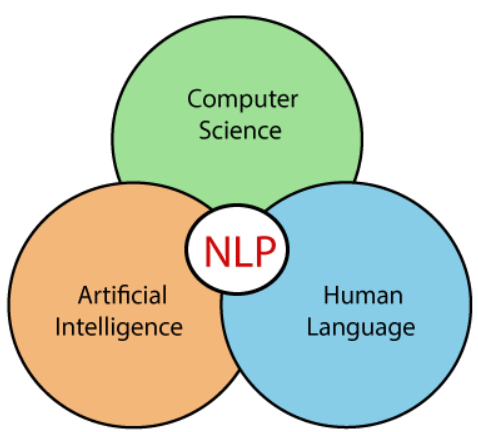

# **Components of NLP**

* **Natural Language Understanding (NLU)**:
> * NLU is used to understand the human language by extracting the key elements like syntax, context, intent, feeling, etc.
> * NLU takes the unstructured text and converts it into a structured format.


* **Natural Language Generation (NLG)**:
> * NLG is used to generate meaningful text that is understandable by a human.
> * It is used in various real-world applications to generate human-readable text from structured data.


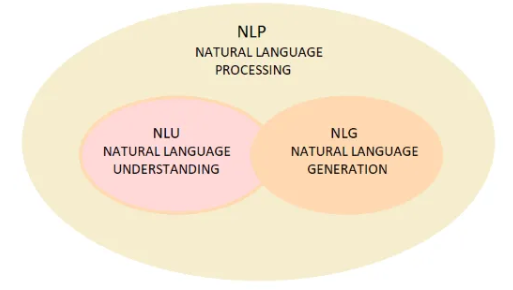

# **Applications of NLU and NLG**

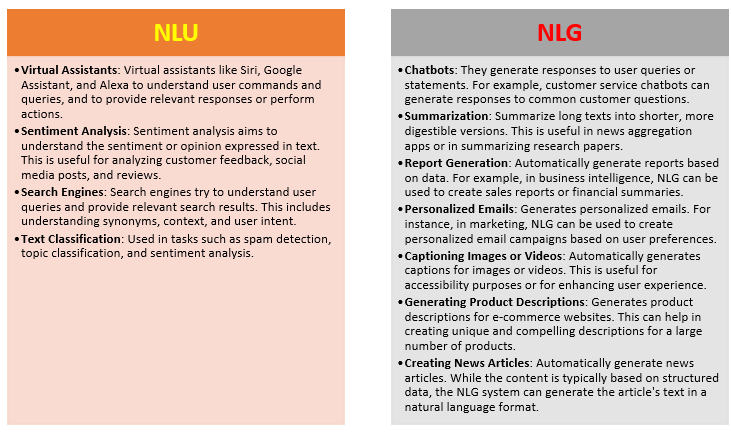



# **NLP Pipeline**

*  The operations of NLP can be described as a pipeline:

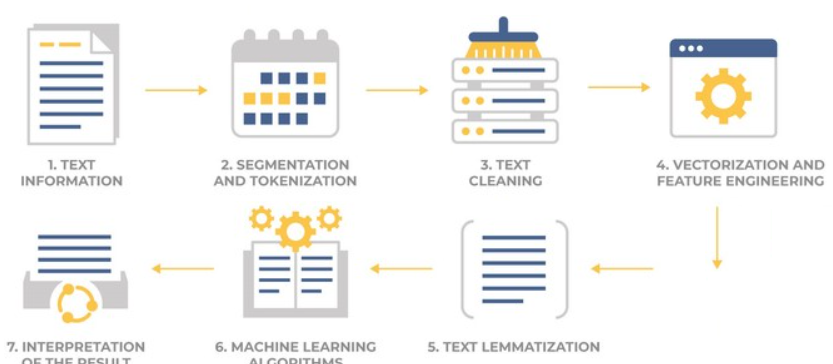


# **Evolution of NLP**

* **Recurrent Neural Network (RNN)**
> * A  type of artificial neural network designed to process **sequential data**.
> * Unlike traditional feedforward neural networks, which have a fixed input size and no memory, RNNs have a dynamic, flexible structure that allows them to maintain a state (or **memory**) of what they have seen so far in the sequence.
> * This ability to retain memory makes RNNs particularly useful for tasks such as **language modeling** where context and temporal dependencies are important.

* **Long Short-Term Memory (LSTM)**
> * It is a type of RNN architecture that is designed to overcome the vanishing gradient problem and capture long-term dependencies in sequential data.
> * LSTM networks have a more complex architecture compared to traditional RNNs, with additional components called **gates** that control the flow of information.
> * These gates include the **input gate**, **forget gate**, and **output gate**, each of which serves a specific purpose in controlling the flow of information through the network.




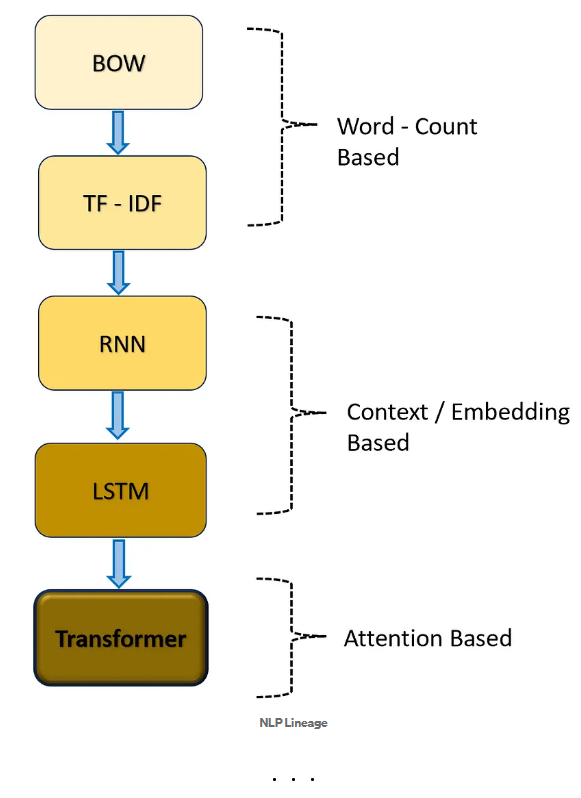

# **Bag of Words (BOW)**

* Bag of Words (BOW) is a simple and commonly used technique in NLP for feature extraction from text.
* It represents text data as a bag, or multiset, of words, disregarding grammar and word order.
* The basic idea is to convert text into numerical representations that can be used by machine learning algorithms.

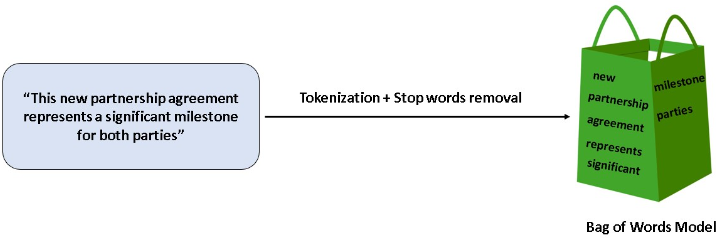

# **CountVectorizer**

* **CountVectorizer** is commonly used in natural language processing (NLP) tasks, such as text classification, sentiment analysis, and clustering, where machine learning algorithms require numerical input.
* The purpose of CountVectorizer in scikit-learn is to convert a collection of text documents into a matrix of token counts.
* This means that it takes a list of strings (text documents) as input and produces a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary.
* The value at each cell in the matrix represents the frequency of a word in a document.


### **The fit_transform method**

* **.fit()**:
> * It analyzes the given text data (reviews in this case) and builds the vocabulary (a set of unique words present in the text).
> * This step is necessary to establish the mapping between words and indices in the BOW representation.

* **.transform()**:
> * It transforms the input text data into a BOW representation using the vocabulary established in the "fit" step.
> * Each document (movie review) is converted into a vector where each element represents the frequency of a word from the vocabulary in that document.

* **.fit_transform()** both builds the vocabulary and transforms the input text data into a numerical representation suitable for machine learning algorithms, such as those used in sentiment analysis, document classification, and more.

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Sample movie reviews
reviews = [
    "Fantastic movie!",
    "A fine movie.",
    "Confusing movie.",
    "A masterpiece!",
    "A brilliant movie!",
    "Terrible movie."
]

# Create a CountVectorizer object
# CountVectorizer removes all special characters, punctuation and single characters.
vectorizer = CountVectorizer()


# Fit the vectorizer to the data in two steps
#     vectorizer.fit(reviews)
#     bow_representation = vectorizer.transform(reviews)


# Fit and transform the movie reviews in one step
bow_representation = vectorizer.fit_transform(reviews)


# Assuming bow_representation is your BOW representation as a sparse matrix
# and you have already imported numpy as np
bow_array = bow_representation.toarray()

# Convert the BOW array to a DataFrame for nicer formatting
df = pd.DataFrame(bow_array, columns=vectorizer.get_feature_names_out())

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame
print("\nBOW representation:\n\n")
print(df)


BOW representation:


   brilliant  confusing  fantastic  fine  masterpiece  movie  terrible
0          0          0          1     0            0      1         0
1          0          0          0     1            0      1         0
2          0          1          0     0            0      1         0
3          0          0          0     0            1      0         0
4          1          0          0     0            0      1         0
5          0          0          0     0            0      1         1


# **Term Frequency-Inverse Document Frequency (TF-IDF)**

* TF-IDF is another commonly used technique for text representation in NLP.
* It reflects how important a word is to a document in a collection of documents.
* TF-IDF considers both the frequency of a term in a document (**Term Frequency**) and the rarity of the term in the entire document collection (**Inverse Document Frequency**).
* TF-IDF is used to find the relevance of a term in a document and is often used in information retrieval and text mining tasks.

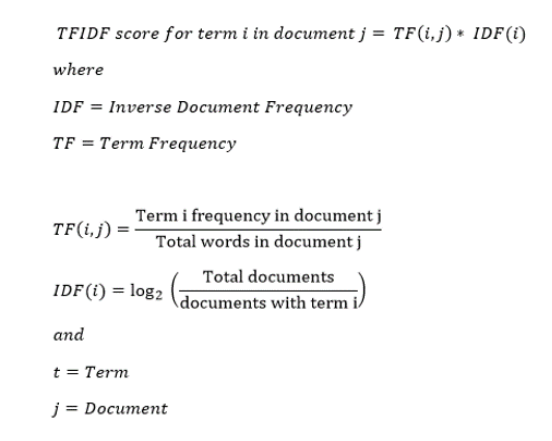

# **Note**

* When **document frequency** (DF) is in a very low range, small differences in DF can have a dramatic impact on **N/DF** and hence on the score.

* N/DF is low for common terms (100 occurrences of **terrible** in a corpus of size 100 would give N/DF = 1), and high for rare ones (100 occurrences of **terrible** in a corpus of size 100,000 would give N/DF = 1000).

* We might like to smooth out the decline of N/DF when DF is in the lowest end of its range. One way to do this is to take the **log of N/DF**.

* We could try to use a different smoothing function here, but **log** is straightforward and it does what we want. This chart compares N/DF and log(N/DF) assuming N=100:

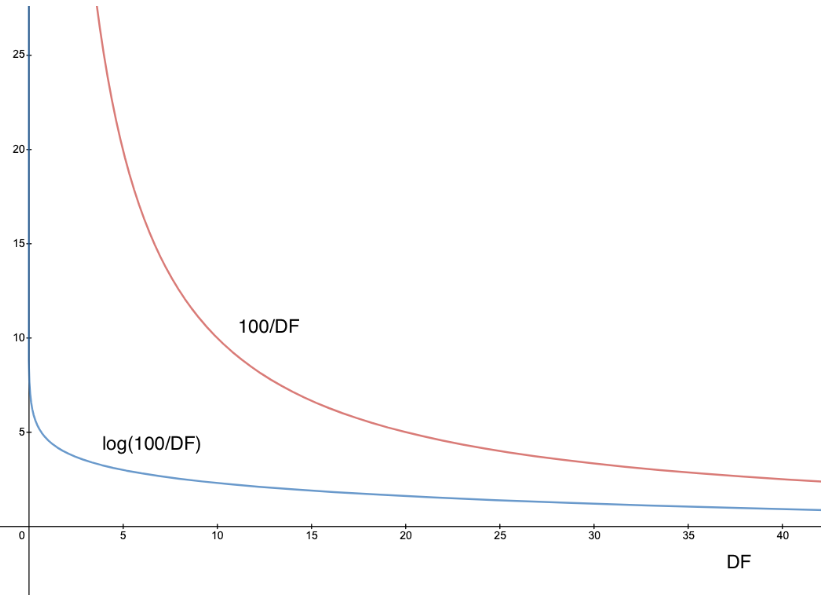

# **TfidfVectorizer**

* It converts a collection of text documents into a **matrix** where each row represents a document and each column represents a unique word in the corpus. * The value at each cell in the matrix is the TF-IDF value for that word in that document.

* It also provides options to preprocess the text data, remove stopwords, apply tokenization, and control the vocabulary size and IDF smoothing, etc.

* **IDF smoothing** refers to the technique used to prevent division by zero when calculating IDF values. It adds a small value (usually 1) to the document frequency, ensuring that the denominator is never zero.

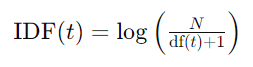



In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the movie reviews
tfidf_representation = vectorizer.fit_transform(reviews)

# Print the TF-IDF representations


# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_representation.toarray(), columns=vectorizer.get_feature_names_out())

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Print the entire TF-IDF matrix with row and column headings
print("TF-IDF representation:\n\n")
print(tfidf_df)



TF-IDF representation:


   brilliant  confusing  fantastic      fine  masterpiece     movie  terrible
0   0.000000   0.000000   0.889996  0.000000          0.0  0.455969  0.000000
1   0.000000   0.000000   0.000000  0.889996          0.0  0.455969  0.000000
2   0.000000   0.889996   0.000000  0.000000          0.0  0.455969  0.000000
3   0.000000   0.000000   0.000000  0.000000          1.0  0.000000  0.000000
4   0.889996   0.000000   0.000000  0.000000          0.0  0.455969  0.000000
5   0.000000   0.000000   0.000000  0.000000          0.0  0.455969  0.889996


# **Interpretation of TF-IDF values**

* Higher TF-IDF values indicate that a term is more important in a specific movie review compared to the rest of the reviews.
* For example, a high TF-IDF value for the term "**brilliant**" in a review suggests that "**brilliant**" is a significant term in that review but is less common across the other reviews in the corpus.
* Conversely, a low TF-IDF value for a term indicates that the term is less important or common in the specific review compared to the rest of the reviews.

# **Text Classification with MLP**

* The **size of the input layer** is equal to the **number of columns in the TF-IDF** matrix which is the number of unique words in the vocabulary after preprocessing the text data.
* This number can vary depending on the size of the vocabulary and the specific preprocessing steps applied to the text data.

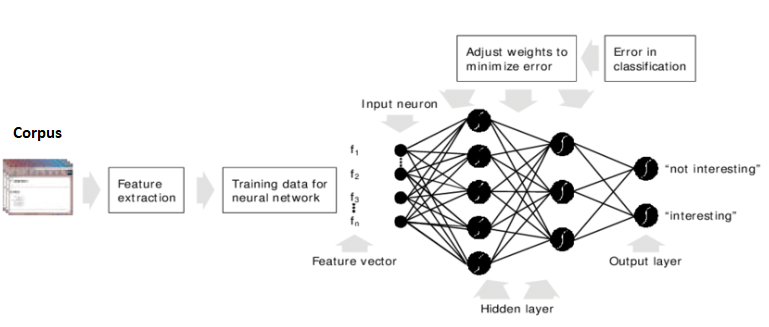



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample movie reviews (50 reviews)
reviews = [
    "The movie was fantastic, I loved every moment of it!",
    "Terrible movie, I regret watching it.",
    "The plot was confusing and the acting was mediocre.",
    "A masterpiece of cinematography, the visuals were stunning.",
    "I couldn't stand the lead actor, it ruined the whole movie for me.",
    "Absolutely brilliant! The storyline was captivating.",
    "Boring movie, I fell asleep halfway through.",
    "The movie had a lot of potential but fell short in execution.",
    "The ending was predictable, but overall a decent movie.",
    "I would highly recommend this movie to everyone!",
    "An absolute waste of time and money.",
    "The acting was top-notch, but the story was lacking.",
    "I was on the edge of my seat the entire time!",
    "The movie was too long and dragged on.",
    "The special effects were amazing!",
    "The characters were well-developed and relatable.",
    "I laughed so hard, my stomach hurt!",
    "The movie was a complete disappointment.",
    "I was pleasantly surprised by how good it was.",
    "The movie made me cry.",
    "I couldn't get into the movie, it felt disjointed.",
    "The soundtrack was perfect for the movie.",
    "The movie was overhyped and didn't live up to it.",
    "I wish I hadn't wasted my time watching this movie.",
    "The movie was a visual feast.",
    "The dialogue was witty and engaging.",
    "I was bored throughout the entire movie.",
    "The movie kept me guessing until the end.",
    "The acting was wooden and unconvincing.",
    "I felt emotionally drained after watching this movie.",
    "The movie was thought-provoking and deep.",
    "The pacing of the movie was off, it felt rushed.",
    "I couldn't stop thinking about the movie after it ended.",
    "The movie was a bit predictable, but still enjoyable.",
    "The movie was too dark and depressing for my taste.",
    "I was disappointed by the lack of character development.",
    "The movie was visually stunning but lacked substance.",
    "I was blown away by the movie's twist ending.",
    "The movie was a rollercoaster of emotions.",
    "I found the movie to be cliched and unoriginal.",
    "The movie was a beautiful portrayal of love and loss.",
    "I was captivated by the movie from start to finish.",
    "The movie was a complete flop.",
    "I was intrigued by the movie's premise but ultimately let down.",
    "The movie was a fun ride from beginning to end.",
    "I couldn't get past the movie's poor acting.",
    "The movie was a true work of art.",
    "I was hooked from the first scene of the movie.",
    "The movie was an absolute joy to watch.",
    "I was left speechless by the movie's ending."
]

# Labels for the reviews (1 for positive, 0 for negative)
labels = [1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
          0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
          0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
          0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
          1, 0, 1, 0, 1, 1, 0, 1, 1, 0]


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit-transform the reviews
X = vectorizer.fit_transform(reviews)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=55)

# Create an MLP classifier
classifier = MLPClassifier(hidden_layer_sizes=(200,200), max_iter=100, random_state=55)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Print the confusion matrix with column headings
print("\nConfusion Matrix:")
print(conf_matrix_df)



Accuracy on the test set: 0.4

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   2                  12
Actual Positive                   3                   8


# **Limitations of BOW and TF-IDF**

* BOW and TF-IDF are simplistic approaches in NLP where text is represented as an unordered collection of words, disregarding grammar and word order. While they have some merits, they also come with several limitations:

* **Loss of sequence information**: BOW discards the order of words in a document, leading to a loss of important sequential information. This can be critical in tasks like sentiment analysis, where the arrangement of words greatly impacts the sentiment conveyed.

* **Sparse representations**: Each document is represented in BOW as a high-dimensional vector, with each dimension corresponding to a unique word in the corpus. Since most documents only contain a small subset of the entire vocabulary, these vectors are highly sparse, which can lead to computational inefficiencies and require large memory storage.
Lack of semantic understanding: BOW treats each word as independent and assigns equal importance to all words, disregarding their semantic relationships. This approach fails to capture the nuanced meanings conveyed by word semantics, leading to limitations in tasks like text classification and information retrieval.

* **Out-of-vocabulary words**: BOW struggles with out-of-vocabulary words, i.e., words not seen during training. These words are either ignored or replaced with a special token, leading to a loss of information and potentially impacting the performance of downstream tasks.

* **Inability to handle negations and modifier**s: BOW does not capture linguistic nuances such as negations or modifiers effectively. For instance, "**good**" and "**not good**" would be represented similarly, despite conveying opposite sentiments.

* **Scaling issues**: As the size of the corpus increases, the dimensionality of BOW representations also increases, leading to scalability issues in terms of computation and memory requirements.

* **Lack of semantic understanding**: TF-IDF treats each word independently and does not consider the context or meaning of the words in a document. This can lead to difficulties in capturing the semantic relationships between words and may result in suboptimal performance for tasks requiring semantic understanding.

* **Sensitivity to document length**: TF-IDF is sensitive to document length. Longer documents tend to have higher raw term frequencies, potentially biasing the importance scores towards longer documents. Normalization techniques like TF-IDF weighting can mitigate this issue to some extent, but it may still impact the performance, especially in tasks where document length varies significantly.

* **Difficulty in capturing word relationships**: TF-IDF does not capture relationships between words, such as synonyms or related terms. Words with similar meanings but different forms may not be treated equally, leading to a loss of information and potentially affecting the quality of representations.







## **The Rise of Transformers**

* To address above limitations, more advanced techniques such as **word embeddings**, **recurrent neural networks (RNNs)**, and **transformer models** have been developed.

* These allow NLP models to capture richer semantic information and achieve better performance on various tasks.

* **Transformers**, a type of deep learning model architecture,  do not use TF-IDF directly. Instead, transformers rely on attention mechanisms and **self-attention mechanisms** to learn contextual representations of words or tokens in a sequence.

* Transformer models such as **BERT (Bidirectional Encoder Representations from Transformers)** and **GPT (Generative Pre-trained Transformer)**, utilize neural network architectures that learn contextualized embeddings of words or tokens.

* These models are trained on large corpora of text data using unsupervised or semi-supervised learning objectives to capture the contextual relationships between words or tokens in a sequence.

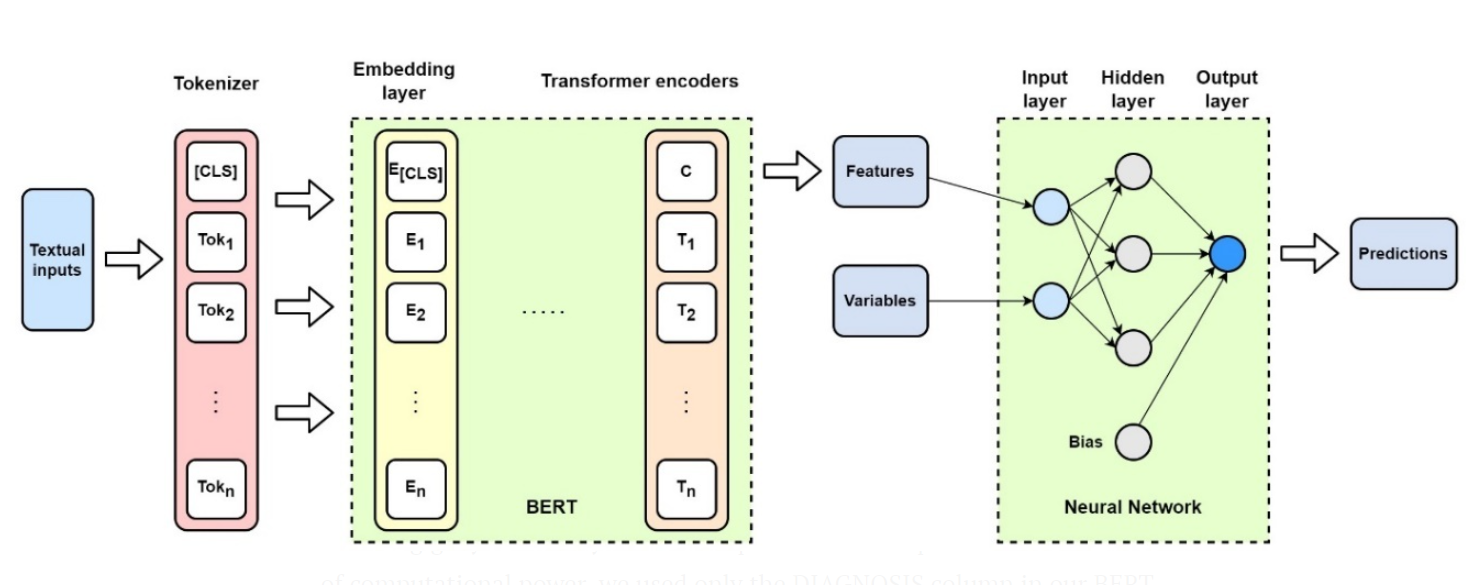

# **Word Embeddings**

* **Word embeddings** are a type of word representation in natural language processing (NLP) that allows words to be represented as vectors of real numbers in a high-dimensional space.

* Each word is mapped to a **dense vector of continuous values**, which capture semantic and syntactic information about the word based on its context in a large corpus of text.

* **Word embeddings are learned from data** using neural network models such as Word2Vec, GloVe, or FastText.

* These models are trained on large corpora of text to predict the surrounding words of a target word, effectively learning the meaning of words based on their usage in context.

* The key idea behind word embeddings is that similar words should have similar embeddings, meaning that the distance between the vectors of two words in the embedding space should reflect their semantic similarity.

* This allows word embeddings to capture relationships between words, such as analogies (e.g., "**king**" is to "**queen**" as "**man**" is to "**woman**"), and to be used in various NLP tasks such as sentiment analysis, machine translation, and named entity recognition.


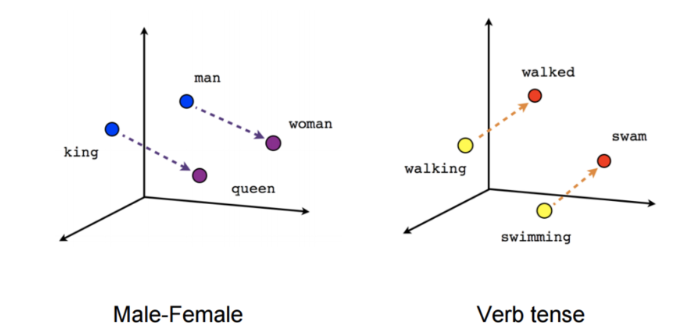


# **The Attention Mechanism**

* The **attention mechanism** is a key component in many advanced neural network architectures, especially in NLP tasks.

* It allows the model to focus on different parts of the input sequence (such as words in a sentence) with varying degrees of attention.

* This mechanism helps the model to learn which parts of the input are more important for producing a certain output, improving the model's performance on tasks that require understanding of long-range dependencies.

* In simple terms, the attention mechanism works by assigning weights to each element in the input sequence based on its relevance to the current decoding step.

* These weights are computed dynamically during the model's training process, allowing the model to learn which parts of the input to focus on for each output step.

* The attention mechanism has been used in various architectures, such as the Transformer model, which has been widely adopted in NLP for tasks like machine translation, text summarization, and language modeling.

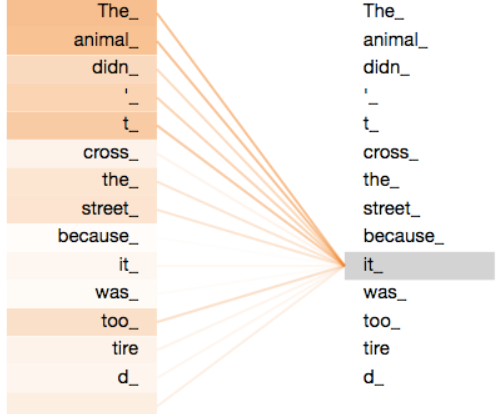

In [15]:
 !pip install torch transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [21]:
# Step 1: Import libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

# Step 2: Split data into training and validation sets
train_reviews, val_reviews, train_labels, val_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Step 3: Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 4: Tokenize and encode the text data
train_encodings = tokenizer(train_reviews, truncation=True, padding=True)
val_encodings = tokenizer(val_reviews, truncation=True, padding=True)

# Step 5: Convert labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Step 6: Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Step 7: Define data loaders for training and validation
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)

val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            val_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Step 8: Fine-tune the BERT model
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()

    val_losses = []
    val_accs = []
    all_preds = []
    all_labels = []

    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        val_loss = outputs.loss
        val_losses.append(val_loss.item())
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

        correct = (preds == labels).sum().item()
        val_acc = correct / len(labels)
        val_accs.append(val_acc)

    avg_val_loss = sum(val_losses) / len(val_losses)
    avg_val_acc = sum(val_accs) / len(val_accs)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss}, Validation Accuracy: {avg_val_acc}")





Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10, Validation Loss: 0.7327881455421448, Validation Accuracy: 0.25
Epoch 2/10, Validation Loss: 0.7183135747909546, Validation Accuracy: 0.25
Epoch 3/10, Validation Loss: 0.7391242384910583, Validation Accuracy: 0.25
Epoch 4/10, Validation Loss: 0.7218217849731445, Validation Accuracy: 0.4375
Epoch 5/10, Validation Loss: 0.7372062504291534, Validation Accuracy: 0.4375
Epoch 6/10, Validation Loss: 0.7897850275039673, Validation Accuracy: 0.4375
Epoch 7/10, Validation Loss: 0.849404364824295, Validation Accuracy: 0.375
Epoch 8/10, Validation Loss: 0.9148549139499664, Validation Accuracy: 0.375
Epoch 9/10, Validation Loss: 1.015694946050644, Validation Accuracy: 0.375
Epoch 10/10, Validation Loss: 1.1041008532047272, Validation Accuracy: 0.375


In [22]:
# The confusion matrix
import numpy as np

preds_np = np.array(all_preds)
labels_np = np.array(all_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels_np, preds_np)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[1 3]
 [4 2]]


In [27]:
# New movie review
new_review = "This movie was amazing! The acting was superb and the storyline was captivating."

# Preprocess the new review
new_review_encodings = tokenizer(new_review, truncation=True, padding=True)

# Convert the tokenized review to PyTorch tensors
input_ids = torch.tensor(new_review_encodings['input_ids']).unsqueeze(0)  # Add batch dimension
attention_mask = torch.tensor(new_review_encodings['attention_mask']).unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# Get the predicted class label
predicted_class_label = torch.argmax(outputs.logits).item()

# Determine the sentiment based on the predicted class label
sentiment = "positive" if predicted_class_label == 1 else "negative"

print("Predicted Sentiment:", sentiment)

Predicted Sentiment: positive
